In [1]:
import numpy as np
from logistic_regression.GrdDscntQuant import grdescentquant
from logistic_regression.normal_logistic import normallogistic
from logistic_regression.GrdDscnt import grdescentnormal
from logistic_regression.quant_logistic import quant_logistic
from logistic_regression.GrdDscntUncoded import grdescentuncoded
from logistic_regression.uncoded_logistic import  uncoded_logistic
from quantization.quantize import quantize
from coded_computation.master import master
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import arff
from pad_and_clean import pad
from pad_and_clean import clean_and_scale
import time
from gen_data import gen_seperable_data, gen_margin_seperable_data
from sklearn.model_selection import train_test_split
from run_test import run

# do runs, make plots.

(500, 45) (500, 1)
(400, 45) (400, 1)
(100, 45) (100, 1)


In [2]:
# seperable data #1
X,y,w = gen_seperable_data(800,100)

run(1,X,y,"seperable1.csv")

0


/Users/willem/Desktop/research/low_access-merge_tql/logistic_regression/normal_logistic.py:27: RuntimeWarning: overflow encountered in exp
  loss = np.sum(np.log(1 + np.exp(-yTr * y_pred)))
/Users/willem/Desktop/research/low_access-merge_tql/logistic_regression/normal_logistic.py:28: RuntimeWarning: overflow encountered in exp
  den = (1 + np.exp(yTr * y_pred))
/Users/willem/Desktop/research/low_access-merge_tql/coded_computation/node.py:68: RuntimeWarning: overflow encountered in matmul
  return (self.data@w).reshape(-1,1)
/Users/willem/Desktop/research/low_access-merge_tql/coded_computation/master.py:57: RuntimeWarning: overflow encountered in add
  ans += self.nodes_list[-1].query(w[width*(len(self.nodes_list)-1):,:], dict)
/Users/willem/Desktop/research/low_access-merge_tql/coded_computation/master.py:59: RuntimeWarning: overflow encountered in matmul
  expected = X @ w
/Users/willem/Desktop/research/low_access-merge_tql/coded_computation/master.py:56: RuntimeWarning: overflow enco

ValueError: wrong +- query: expected (644, 1), got (644, 1). with error: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]

In [3]:
# seperable data #2
X,y,w = gen_seperable_data(800,50)

run(1,X,y,"seperable2.csv")

e out, ein from unquantized logistic regresison: (0.006211180124223602, 0.006211180124223602),  on 18 iterations in 0.029738187789916992 seconds


0

In [7]:
# margined seperable data #1

X,y,w = gen_margin_seperable_data(800,100,1)

run(1,X,y,"marginal1.csv")

e in, e out from unquantized logistic regresison: (0.007763975155279503, 0.006211180124223602) on 1 iterations in 0.0017879009246826172 seconds
0


/Users/willem/Desktop/research/low_access-merge_tql/get_loss.py:5: RuntimeWarning: overflow encountered in exp
  probs = 1 / (1 + np.exp(-log_odds))
/Users/willem/Desktop/research/low_access-merge_tql/logistic_regression/quant_logistic.py:25: RuntimeWarning: overflow encountered in exp
  func = lambda x: 1 / (1 + np.exp(x))


ValueError: cannot reshape array of size 5152 into shape (1,644)

In [ ]:
# margined sperable data #2

X,y,w = gen_margin_seperable_data(800,50,1)

run(1,X,y,"marginal2.csv")

In [2]:
# real data #1

data = arff.loadarff('/Users/willem/Downloads/speeddating.arff')
df = pd.DataFrame(data[0])

hill_train_x, hill_test_x, hill_train_y, hill_test_y = clean_and_scale(df, "match")
hill_train_x, hill_train_y = pad(hill_train_x, hill_train_y, 7)
hill_test_x, hill_test_y = pad(hill_test_x, hill_test_y, 7)

print(hill_train_x.shape, hill_train_y.shape, hill_test_x.shape, hill_test_y.shape)

X = np.vstack((hill_test_x,hill_train_x))
y = np.vstack((hill_test_y, hill_train_y))
run(1,X,y, "real_data1.csv")


(840, 238) (840, 1) (210, 238) (210, 1)


/Users/willem/Desktop/research/low_access-merge_tql/logistic_regression/normal_logistic.py:28: RuntimeWarning: overflow encountered in exp
  den = (1 + np.exp(yTr * y_pred))


e in, e out from unquantized logistic regresison: (0.08333333333333333, 0.24285714285714285) on 3174 iterations in 2.5972418785095215 seconds
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


KeyboardInterrupt: 

In [ ]:
# real data #2

In [ ]:
# real data #3 

# plots produced below...

In [11]:
# add func to make heatmaps...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def get_df(filepath):

    column_names = [
        'w-quantization', 'grd-quantization', 'imputation', 'access',
        'query type', 'time', 'stop cond', 'iters', "e in", "e_out"
    ]

    df = pd.read_csv(filepath, header=None, names=column_names)
    return df


def generate_plots(df, variable, baseline):
    # create a normalized 3d bar plot visualizing the variable of interest... will need to clean the df first for most vars
    df_numeric = df.select_dtypes(include=[np.number])  # ensure that there are no non numeric cols

    grouped = df_numeric.groupby(['w-quantization', 'grd-quantization']).mean()
    grouped = grouped.reset_index()


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = grouped['w-quantization']
    y = grouped['grd-quantization']
    z = (grouped[variable] - baseline) / baseline

    # bar positions and width
    dx = dy = 0.5
    dz = z

    ax.bar3d(x, y, [0]*len(z), dx, dy, dz, color='b')

    ax.set_xlabel('w-quantization')
    ax.set_ylabel('grd-quantization')
    ax.set_zlabel(f' average of {variable} by quantization lvls')

    plt.show()

# df = get_df("test.csv")
# df = df[df["time"] != 0]
# generate_plots(df, "time", 1)


In [9]:
# we want graphs that go like...

# quantized system
# unquantized system
# the normalized difference between the two

dfs = ["seperable1.csv", "seperable2.csv", "marginal1.csv", "real_data1.csv"]

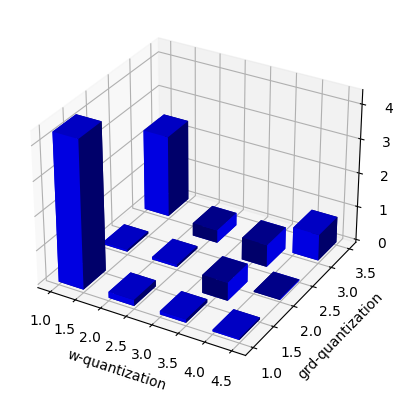

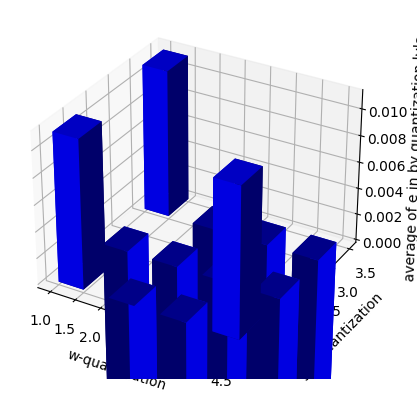

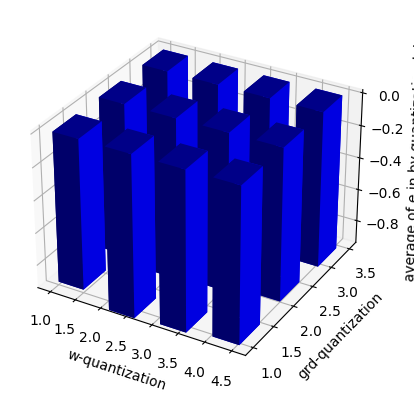

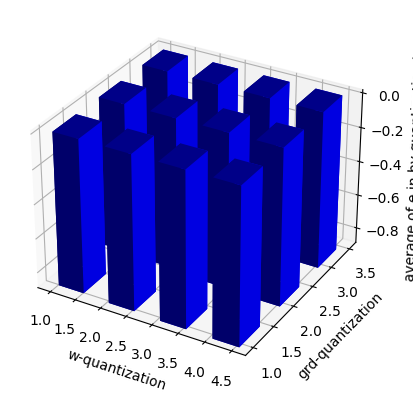

In [13]:
# normalized e_in heatmaps
e_ins = [0.006211180124223602, 0.045454545454545456, 0.007763975155279503, 0.08333333333333333]
for i,df in enumerate(dfs):
    df = get_df(df)
    df = df[df["e in"] != -1]
    generate_plots(df, "e in", e_ins[i])

In [6]:
# normalized e_out heatmaps

In [7]:
# access but in a hand wavy manner

In [8]:
# normalized iterations

In [ ]:
# time, maybe